Good matches found: 24


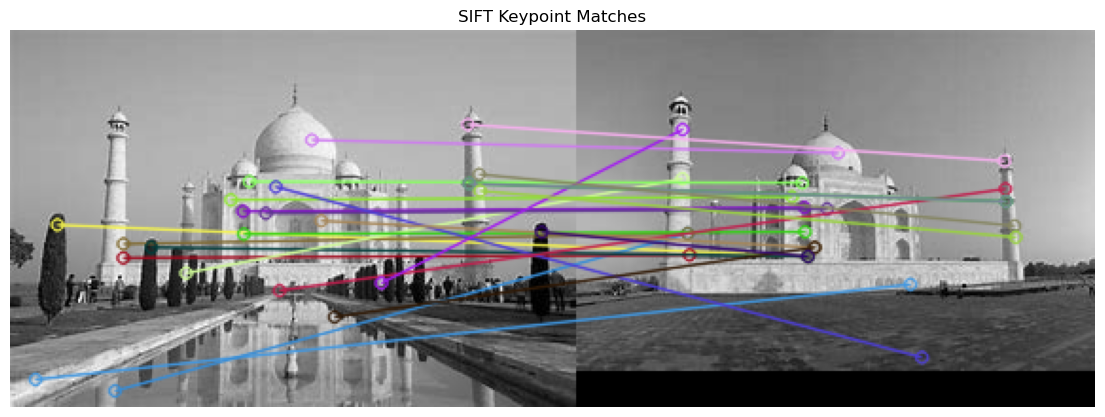

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images in grayscale
img1 = cv2.imread('taj.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('taj2.jpeg', cv2.IMREAD_GRAYSCALE)


if img1 is None or img2 is None:
    print("Error loading images.")
else:
    # Step 1: Initialize SIFT
    sift = cv2.SIFT_create()

    # Step 2: Detect keypoints and compute descriptors
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Step 3: Match using FLANN
    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)

    # Step 4: Filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.8 * n.distance:
            good_matches.append(m)

    print(f"Good matches found: {len(good_matches)}")

    # Step 5: Draw and show matches
    result_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

    plt.figure(figsize=(14, 7))
    plt.imshow(result_img, cmap='gray')
    plt.title("SIFT Keypoint Matches")
    plt.axis('off')
    plt.show()
